<h1>IBM Data Science Certificate Project</h1>
<h3>Alessandro Bax</h3>
<hr>
<h3>San Francisco Crime Data Analysis</h3>
<p>This project aims to analyse San Francisco crime, and identify the main areas affected by the crime, as well as understand the frequency of the crimes in each day of the week and the most frequent category of crimes in the city</p>
<hr>

<h4>Importing the libs</h4>

In [14]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import matplotlib.pyplot as plt

<h4>The first look at the data</h4>
<p>This dataset is from a Kaggle Competition, and contains incidents derived from SFPD Crime Incident Reporting system, as listed below:</p>
<ul>
<li><b>Dates:</b> timestamp of the crime incident</li>
<li><b>Category:</b> category of the crime incident</li>
<li><b>Descript:</b> detailed description of the crime incident</li>
<li><b>DayOfWeek:</b> the day of the week</li>
<li><b>PdDistrict:</b> name of the Police Department District</li>
<li><b>Resolution:</b> how the crime incident was resolved</li>
<li><b>Address:</b> the approximate street address of the crime incident</li>
<li><b>X:</b> Longitude</li>
<li><b>Y:</b> Latitude</li>
</ul>

In [5]:
df=pd.read_csv('data/train.csv')
df.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [6]:
df.shape

(878049, 9)

<h3>Visualizing the data and the features</h3>
<p>Let's see the most frequent crimes, and the number os crimes by district</p>

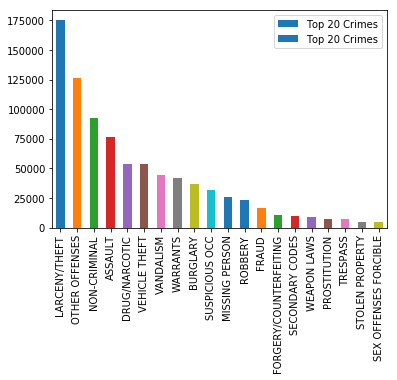

In [37]:
num = 20
df.Category.value_counts()[:num].plot(kind='bar',label='Top %s Crimes'%num)
plt.legend()
plt.show()

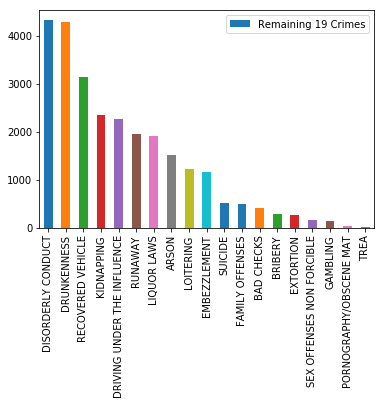

In [35]:
renum = len(df.Category.value_counts()[num:])
df.Category.value_counts()[num:].plot(kind='bar',label='Remaining %s Crimes'%renum)
plt.legend()
plt.show()

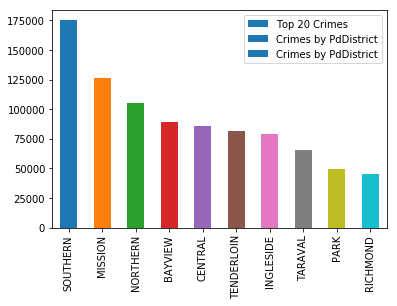

In [33]:
df.PdDistrict.value_counts().plot(kind='bar',label='Crimes by PdDistrict')
plt.legend()
plt.show()

<h4>Importing the libs for geospacial analysis</h4>

In [38]:
import folium # map rendering library
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim

<h4>Setting the base map from the address 'San Francisco, CA, USA'</h4>

In [54]:
address = 'San Francisco, CA, USA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

/Users/alessandrobax/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.


<b>As the dataset was quite large, I made a random sample so it's easier to analyse</b>

In [51]:
dfSample = df.sample(frac=0.001)
dfSample.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
113729,2013-11-01 09:35:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,RICHMOND,COMPLAINANT REFUSES TO PROSECUTE,400 Block of 29TH AV,-122.489015,37.780842
13465,2015-03-07 01:33:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Saturday,MISSION,"ARREST, BOOKED",1000 Block of POTRERO AV,-122.406539,37.756486
585676,2007-01-26 21:30:00,VANDALISM,"MALICIOUS MISCHIEF, GRAFFITI",Friday,CENTRAL,NONE,600 Block of LEAVENWORTH ST,-122.414971,37.786987
47455,2014-09-29 10:00:00,NON-CRIMINAL,CASE CLOSURE,Monday,PARK,LOCATED,1200 Block of PAGE ST,-122.441394,37.771727
750175,2004-09-16 19:10:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,NORTHERN,NONE,GOUGH ST / ELLIS ST,-122.424296,37.783398
263968,2011-10-19 04:05:00,FRAUD,DEFRAUDING AN INNKEEPER,Wednesday,MISSION,NONE,200 Block of CHURCH ST,-122.428952,37.766800
492799,2008-06-01 09:07:00,BURGLARY,"BURGLARY, HOT PROWL, FORCIBLE ENTRY",Sunday,INGLESIDE,NONE,200 Block of JUDSON AV,-122.447712,37.728331
5224,2015-04-16 21:42:00,LARCENY/THEFT,ATTEMPTED SHOPLIFTING,Thursday,TENDERLOIN,NONE,100 Block of POWELL ST,-122.408014,37.785951
817122,2003-10-27 09:40:00,NON-CRIMINAL,FOUND PROPERTY,Monday,TENDERLOIN,NONE,100 Block of TURK ST,-122.411615,37.783161
341018,2010-08-25 07:31:00,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Wednesday,TENDERLOIN,"ARREST, BOOKED",TURK ST / TAYLOR ST,-122.410769,37.783215


In [52]:
dfSample.shape

(878, 9)

<b>Let's see the datapoints from the crimes plotted in the map, and then identify the regions with more crime incidence</b>

In [58]:
map_geo = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfSample['Y'], dfSample['X'], dfSample['Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_geo)  
    
#map_geo

<img src="https://lh3.googleusercontent.com/0irKNgHpxLTcUuDYNk9vGDrN8PO6qAzM8syp-f8bPx3IT096erHuV5WTYi58Qpi3pKtzSN4sX0JDOdb6fo_uj3v_bDwAQo_ZOLROCQ=w3532-h2124-rw-no"/>

<h3>Now let's get some information from Foursquare</h3>
<hr>
<p>The Foursquare API provides the Venues information nearby the crime location provided. 
Therefore it is possible to identify the closest venue category in which most crimes occour.</p>
<p>Let's start by getting credentials: </p>

In [115]:
CLIENT_ID = 'xxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [78]:
crime_longitude = dfSample.iloc[0]['X']
crime_latitude = dfSample.iloc[0]['Y']
print(crime_latitude, crime_longitude)

37.78084246672621 -122.48901476970501


In [81]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    crime_latitude, 
    crime_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

'https://api.foursquare.com/v2/venues/explore?&client_id=JAUPRPEARDFQKC3IGGSZ40IFFJSNRYNJ12CUCTEIEVAA20S3&client_secret=O4NFUOOFPUXBPN5VHAFO2WBJJ2BWIP5YJJ4A0EUY4OK5E3NF&v=20180605&ll=37.78084246672621,-122.48901476970501&radius=500&limit=100'

In [83]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [85]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Saltroot Café,Café,37.781774,-122.491252
1,Grocery Outlet,Grocery Store,37.779681,-122.487463
2,Jang Soo BBQ,Korean Restaurant,37.779978,-122.487139
3,Fiorella,Italian Restaurant,37.782004,-122.484554
4,Pagan,Burmese Restaurant,37.781520,-122.493383


In [86]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

59 venues were returned by Foursquare.


<b>Create a function to retrive the venues from the crime category location list</b>

In [89]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Crime Category', 
                  'Crime Categ Latitude', 
                  'Crime Categ Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [90]:
manhattan_venues = getNearbyVenues(names=dfSample['Category'],
                                   latitudes=dfSample['Y'],
                                   longitudes=dfSample['X']
                                  )

In [94]:
san_francisco_venues = manhattan_venues
san_francisco_venues.head(5)

,Crime Category,Crime Categ Latitude,Crime Categ Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,OTHER OFFENSES,37.780842,-122.489015,Saltroot Café,37.781774,-122.491252,Café
1,OTHER OFFENSES,37.780842,-122.489015,Grocery Outlet,37.779681,-122.487463,Grocery Store
2,OTHER OFFENSES,37.780842,-122.489015,Jang Soo BBQ,37.779978,-122.487139,Korean Restaurant
3,OTHER OFFENSES,37.780842,-122.489015,Fiorella,37.782004,-122.484554,Italian Restaurant
4,OTHER OFFENSES,37.780842,-122.489015,Pagan,37.781520,-122.493383,Burmese Restaurant


In [95]:
san_francisco_venues.shape

(57078, 7)

In [96]:
san_francisco_venues.groupby('Crime Category').count()

,Crime Categ Latitude,Crime Categ Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Crime Category,,,,,,
ASSAULT,4333,4333,4333,4333,4333,4333
BRIBERY,27,27,27,27,27,27
BURGLARY,1977,1977,1977,1977,1977,1977
DISORDERLY CONDUCT,398,398,398,398,398,398
DRUG/NARCOTIC,3848,3848,3848,3848,3848,3848
DRUNKENNESS,258,258,258,258,258,258
EMBEZZLEMENT,14,14,14,14,14,14
EXTORTION,30,30,30,30,30,30
FORGERY/COUNTERFEITING,772,772,772,772,772,772


In [97]:
print('There are {} uniques categories.'.format(len(san_francisco_venues['Crime Category'].unique())))

There are 30 uniques categories.


<h2>The Venue Category list below, show the number of crimes records nearby</h2>
<p>The most frequent places in which the crimes occour nearby are:</p>
<ul>
<li><b>Bar:</b> 1277</li>
<li><b>Vietnamese Restaurant:</b> 1200</li>
<li><b>Bakery:</b> 1101</li>
</ul>

In [103]:
san_francisco_venues.groupby('Venue Category').count()

,Crime Category,Crime Categ Latitude,Crime Categ Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,4,4,4,4,4,4
Acai House,7,7,7,7,7,7
Accessories Store,188,188,188,188,188,188
Adult Boutique,104,104,104,104,104,104
Afghan Restaurant,47,47,47,47,47,47
African Restaurant,37,37,37,37,37,37
Alternative Healer,3,3,3,3,3,3
American Restaurant,727,727,727,727,727,727
Amphitheater,3,3,3,3,3,3
